In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('Output/NEES_summary_with_heliquest.csv')

In [19]:
df.columns

Index(['AA_seq', 'AH', 'Median', 'Mean', 'Organelle', 'NEES_binned', 'phil_A',
       'phob_A', 'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L', 'phob_L',
       'phil_I', 'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W', 'phil_M',
       'phob_M', 'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S', 'phob_S',
       'phil_T', 'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K', 'phil_N',
       'phob_N', 'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E', 'phob_E',
       'phil_H', 'phob_H', 'phil_P', 'phob_P', 'Length', 'Hydrophobicity',
       'H_moment', 'Netcharge', 'Dfactor', 'phil_S_T', 'phil_R_K', 'phil_L_I',
       'phil_F_W', 'phil_M_C', 'phil_D_E', 'phil_N_Q', 'phob_S_T', 'phob_R_K',
       'phob_L_I', 'phob_F_W', 'phob_M_C', 'phob_D_E', 'phob_N_Q'],
      dtype='object')

### NEES-strength-category-based machine learning

In [22]:
# define features
data = df.copy()
features = ['phil_S_T', 'phil_R_K', 'phil_L_I', 'phil_F_W', 'phil_M_C', 'phil_D_E', 'phil_N_Q', 
                       'phil_A', 'phil_G', 'phil_V', 'phil_Y', 'phil_H', 'phil_P']
# features = ['phob_S_T', 'phob_R_K', 'phob_L_I', 'phob_F_W', 'phob_M_C', 'phob_D_E', 'phob_N_Q', 
#                        'phob_A', 'phob_G', 'phob_V', 'phob_Y', 'phob_H', 'phob_P']

print(features)

['phil_S_T', 'phil_R_K', 'phil_L_I', 'phil_F_W', 'phil_M_C', 'phil_D_E', 'phil_N_Q', 'phil_A', 'phil_G', 'phil_V', 'phil_Y', 'phil_H', 'phil_P']


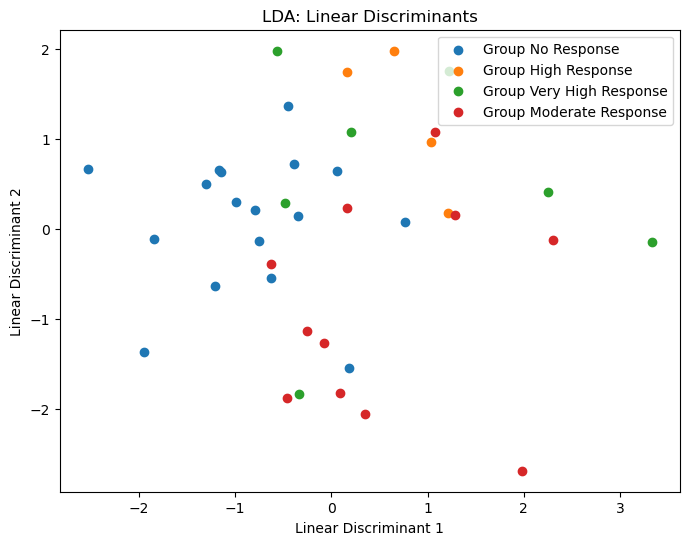

In [23]:
# Perform LDA
x = data.loc[:, features].values
y = data.loc[:, 'NEES_binned'].values
x = StandardScaler().fit_transform(x)

lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data=lda_components, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
lda_df['Group'] = y

# Plot LDA results
plt.figure(figsize=(8, 6))
for group in lda_df['Group'].unique():
    indices = lda_df['Group'] == group
    plt.scatter(lda_df.loc[indices, 'Linear Discriminant 1'],
                lda_df.loc[indices, 'Linear Discriminant 2'],
                label=f'Group {group}')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA: Linear Discriminants')
plt.legend()
plt.show()

### Organelle-type-based machine learning

In [4]:
# Remove rows where 'Organelle' is 5
data_filtered = df[df['Organelle'] != 5]

# Combine categories 1 and 2 into a single category "1"
data_combined = data_filtered.copy()
data_combined['Organelle'] = data_combined['Organelle'].replace({2: 1})

In [5]:
# define features
data = data_combined.copy()
features = data.columns[5:-5]
print(features)
x = data.loc[:, features].values
y = data.loc[:, 'Organelle'].values
x = StandardScaler().fit_transform(x)

Index(['phil_A', 'phob_A', 'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L',
       'phob_L', 'phil_I', 'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W',
       'phil_M', 'phob_M', 'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S',
       'phob_S', 'phil_T', 'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K',
       'phil_N', 'phob_N', 'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E',
       'phob_E', 'phil_H', 'phob_H', 'phil_P', 'phob_P'],
      dtype='object')


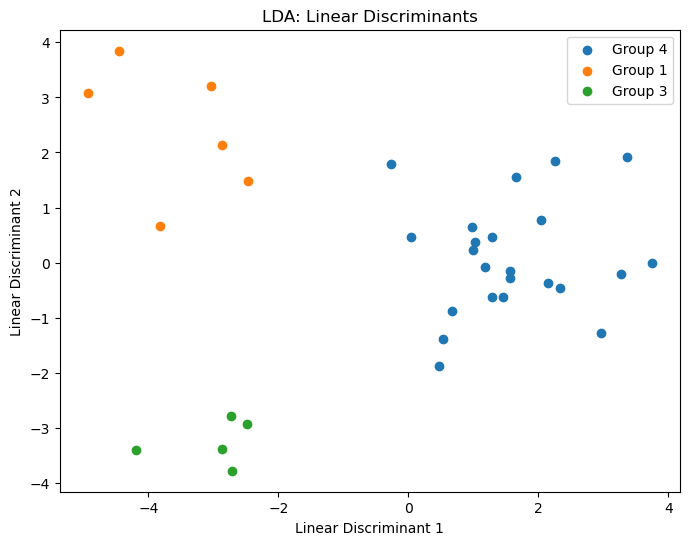

In [6]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data=lda_components, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
lda_df['Group'] = y

# Plot LDA results
plt.figure(figsize=(8, 6))
for group in lda_df['Group'].unique():
    indices = lda_df['Group'] == group
    plt.scatter(lda_df.loc[indices, 'Linear Discriminant 1'],
                lda_df.loc[indices, 'Linear Discriminant 2'],
                label=f'Group {group}')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA: Linear Discriminants')
plt.legend()
plt.show()